# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1:</center>
### <center>  Propiedades en Venta</center>
### <center>  Grupo 18</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn.preprocessing as skp
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
from preprocessing import preprocesamiento

pd.options.display.max_columns = None

In [2]:
_x_train = pd.read_csv('./DataSet/x_train')
_x_train.drop(columns=['Unnamed: 0'],inplace=True)
_y_train = pd.read_csv('./DataSet/y_train')
_y_train.drop(columns=['Unnamed: 0'],inplace=True)
_x_test = pd.read_csv('./DataSet/x_test')
_x_test.drop(columns=['Unnamed: 0'],inplace=True)
_y_test = pd.read_csv('./DataSet/y_test')
_y_test.drop(columns=['Unnamed: 0'],inplace=True)

# Reducción de la dimensionalidad

**d) Reducción de la dimensionalidad:** en este punto se pide crear un nuevo dataset que
resulte de aplicar una reducción de dimensionalidad sobre el dataset que se obtuvo al
finalizar el preprocesamiento.

## ZSCORE - PCA

In [3]:
x_train = _x_train.copy()
y_train = _y_train.copy()
x_test = _x_test.copy()
y_test = _y_test.copy()

Primero normalizamos los datos

In [6]:
f = ['latitud', 'longitud', 'ambientes', 'dormitorios', 'superficie_cubierta', 'comuna']

In [7]:
scaler = StandardScaler()
scaler.fit(x_train[f])#Porque PCA no se lleva bien con las variables dummies
x_train_scaler = scaler.transform(x_train[f]) #Porque PCA no se lleva bien con las variables dummies

Ahora buscamos el hiperparametro de PCA

El numero minimo de componentes para explicar el 95% de la varianza es: 4


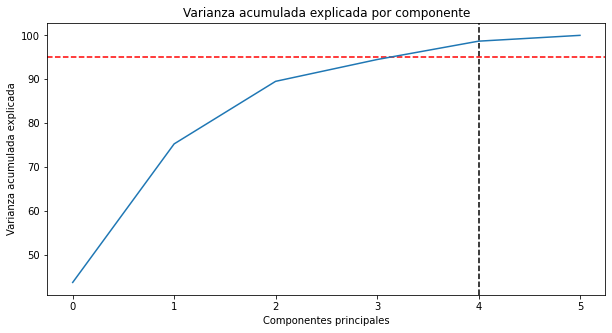

In [8]:
pca = PCA()
pca.fit(x_train_scaler)
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu > 95)
print(
    "El numero minimo de componentes para explicar el 95% de la varianza es: " + str(k)
)
# print("\n")

plt.figure(figsize=[10, 5])
plt.title('Varianza acumulada explicada por componente')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

Aplico PCA con el k obtenido

In [9]:
ipca = PCA(n_components=k)
ipca_transform=ipca.fit_transform(x_train_scaler)

In [10]:
df = pd.DataFrame(data=ipca_transform, columns = ["PCA1", "PCA2", "PCA3", "PCA4"])

In [11]:
x_train = pd.concat([df, x_train[["Departamento", "PH"]]], axis=1)

In [12]:
x_train

,PCA1,PCA2,PCA3,PCA4,Departamento,PH
0,-1.013799,-2.310668,-0.161948,0.180866,1.0,0.0
1,-1.108385,-1.728945,-0.030619,0.005277,1.0,0.0
2,-0.123248,1.124049,-0.533799,-0.405115,1.0,0.0
3,-0.057025,0.568322,-0.645011,-0.304296,1.0,0.0
4,0.397719,0.867322,-0.953229,0.355667,1.0,0.0
...,...,...,...,...,...,...
58156,0.148876,-2.487246,-0.272148,-0.334680,1.0,0.0
58157,-1.217875,0.476842,-0.507543,0.122228,1.0,0.0
58158,-1.158385,-1.473037,-0.835364,-0.176502,1.0,0.0
58159,-1.296330,1.734346,0.153912,-0.028343,1.0,0.0


Replico lo mismo en el test

In [15]:
def zscore_pca(df, scaler, ipca):
    f = ['latitud', 'longitud', 'ambientes', 'dormitorios', 'superficie_cubierta', 'comuna']
    df_scaler = scaler.transform(df[f])
    ipca_transform=ipca.transform(df_scaler)
    _df = pd.DataFrame(data=ipca_transform, columns = ["PCA1", "PCA2", "PCA3", "PCA4"])
    return pd.concat([_df, df[["Departamento", "PH"]]], axis=1)

In [16]:
x_test = zscore_pca(x_test, scaler, ipca)
x_test

,PCA1,PCA2,PCA3,PCA4,Departamento,PH
0,4.879731,-1.823742,1.097820,-1.650970,0.0,0.0
1,1.374922,-2.498697,0.340685,-0.497767,0.0,1.0
2,1.821322,-1.392457,-0.925101,0.377884,1.0,0.0
3,1.197545,-0.794620,0.237632,-0.772707,1.0,0.0
4,0.156142,-0.966397,0.121841,-0.184738,1.0,0.0
...,...,...,...,...,...,...
14536,-1.052349,-1.692866,-0.587629,0.042478,1.0,0.0
14537,0.166904,0.529568,-0.697265,0.032363,0.0,1.0
14538,-1.716246,0.668013,-0.633542,0.244802,1.0,0.0
14539,-1.709192,1.341258,-0.178855,0.315477,1.0,0.0


**Nota:** Los ítems a, b, c y d son los mínimos requeridos para esta etapa, cada grupo puede crear
nuevas variables que resulten derivadas de los atributos existentes o que resulten de incorporar
nuevas fuentes de datos.

### **2. Agrupamiento**
En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para
esta tarea utilizar el algoritmo K-Means y se deberán realizar los siguientes puntos:
* Analizar la tendencia al *clustering* del dataset.
* Estimar la cantidad apropiada de grupos que se deben formar.
* Evaluar la calidad de los grupos formados realizando un análisis de *Silhouette*.
* Realizar un análisis de cada grupo intentando entender en función de qué
características fueron formados.
* Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que
pertenecen.
* Repetir el análisis anterior, utilizando sólo 3 grupos.

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train[f])

In [ ]:
scaler.transform(x_train[f])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans

In [ ]:
from pyclustertend import hopkins
hopkins(scaler.transform(x_train[f]), x_train[f].shape[0])

In [ ]:
# Corro el algoritmo con K entre 2 y 12 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 12))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaler.transform(x_train[f]))
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# Codigo

### **3. Clasificación**

**a) Construcción del target**

Para esta tarea se debe crear una nueva variable ***tipo_precio*** que tendrá tres categorías:
**alto**, **medio**, **bajo**. Esta nueva variable será nuestra clase en el problema de clasificación.
Para determinar cuándo el tipo_precio de una propiedad es alto, medio o bajo se deberá
analizar el precio por metro cuadrado (pxm2). Se propone evaluar las siguientes
alternativas para establecer los límites de cada categoría:

1. Dividir la variable *pxm2* en 3 intervalos con igual cantidad de observaciones.
2. Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones,
el siguiente con el 50% y el último con el 25% de las observaciones restantes.
3. Trabajar la variable pxm2 relativa a cada tipo de propiedad y luego dividirla como en
el punto anterior.

Se pide:
* Mostrar la distribución del precio por metro cuadrado
* Mostrar la distribución del precio por metro cuadrado por tipo de propiedad
* Para cada una de las tres alternativas mostrar gráficamente la distribución de la
nueva variable creada *tipo_precio*.
* Seleccionar una de las alternativas, justificando la misma.
* Comparar, si aplica, la alternativa seleccionada con la división en 3 grupos obtenida
utilizando agrupamiento por K Means.
* Mostrar en un mapa de CABA los avisos coloreados por *tipo_precio*

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**b) Entrenamiento y Predicción**

Predecir el valor del atributo **tipo_precio**, excluyendo del entrenamiento la variable price,
**pxm2** y cualquier otra que pueda contener información del precio de venta. Para todos los
modelos se pide:
* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (*encoding*, normalización, etc)
* Todos los modelos deben ser entrenados también con el *dataset* generado en el
punto **1 d)**


**Modelo 1 : Árbol de decisión**

a. Construir un árbol de decisión y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Graficar el árbol de decisión con mejor performance encontrado en el punto
anterior. Si es muy extenso mostrar una porción representativa.

c. Analizar el árbol de decisión seleccionado describiendo los atributos elegidos, y
decisiones evaluadas (explicar las primeras reglas obtenidas).

d. Evaluar la performance del árbol en el conjunto de evaluación, explicar todas las
métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 2: Random Forest**

a. Construir un clasificador RF y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Analizar la importancia de los atributos

c. Mostrar la conformación final de uno de los árboles generados. Si es muy
extenso mostrar una porción representativa y explicar las primeras reglas.

d. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 3: a elección**

a. En este punto se debe entrenar (mediante cross-validation) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación, explicar todas las métricas y mostrar la matriz de
confusión.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

¿Qué modelo elegirían para clasificar el tipo de precio de las propiedades?

R: